In [ ]:
!pip install pyLDAvis gensim
!pip install langdetect

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

sb.set()

In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import textblob
import re
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
listing = pd.read_csv('listing.csv')
listing.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [ ]:
df = pd.read_csv('reviews.csv')
df.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

In [ ]:
df = df.fillna('')

In [ ]:
len(df)

68275

In [ ]:
df = df[~df['comments'].str.contains("This is an automated posting")]

In [ ]:
comments_list = df['comments']

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
n = []
p = []
ne = []
compound = []

for review in list(comments_list):
    sentiment_scores = sia.polarity_scores(review)
    polarity_score = sentiment_scores['compound']
    negative = sentiment_scores['neg']
    positive = sentiment_scores['pos']
    neutral = sentiment_scores['neu']

    n.append(negative)
    p.append(positive)
    ne.append(neutral)
    compound.append(polarity_score)



In [ ]:
df['positive'] = p
df['negative'] = n
df['neutral'] = ne
df['compound'] = compound

In [ ]:
df.head(1)

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   

                                            comments  positive  negative  \
0  My stay at islam's place was really cool! Good...     0.352       0.0   

   neutral  compound  
0    0.648    0.9626

Text(0.5, 1.0, 'Distribution of Neutral scores')

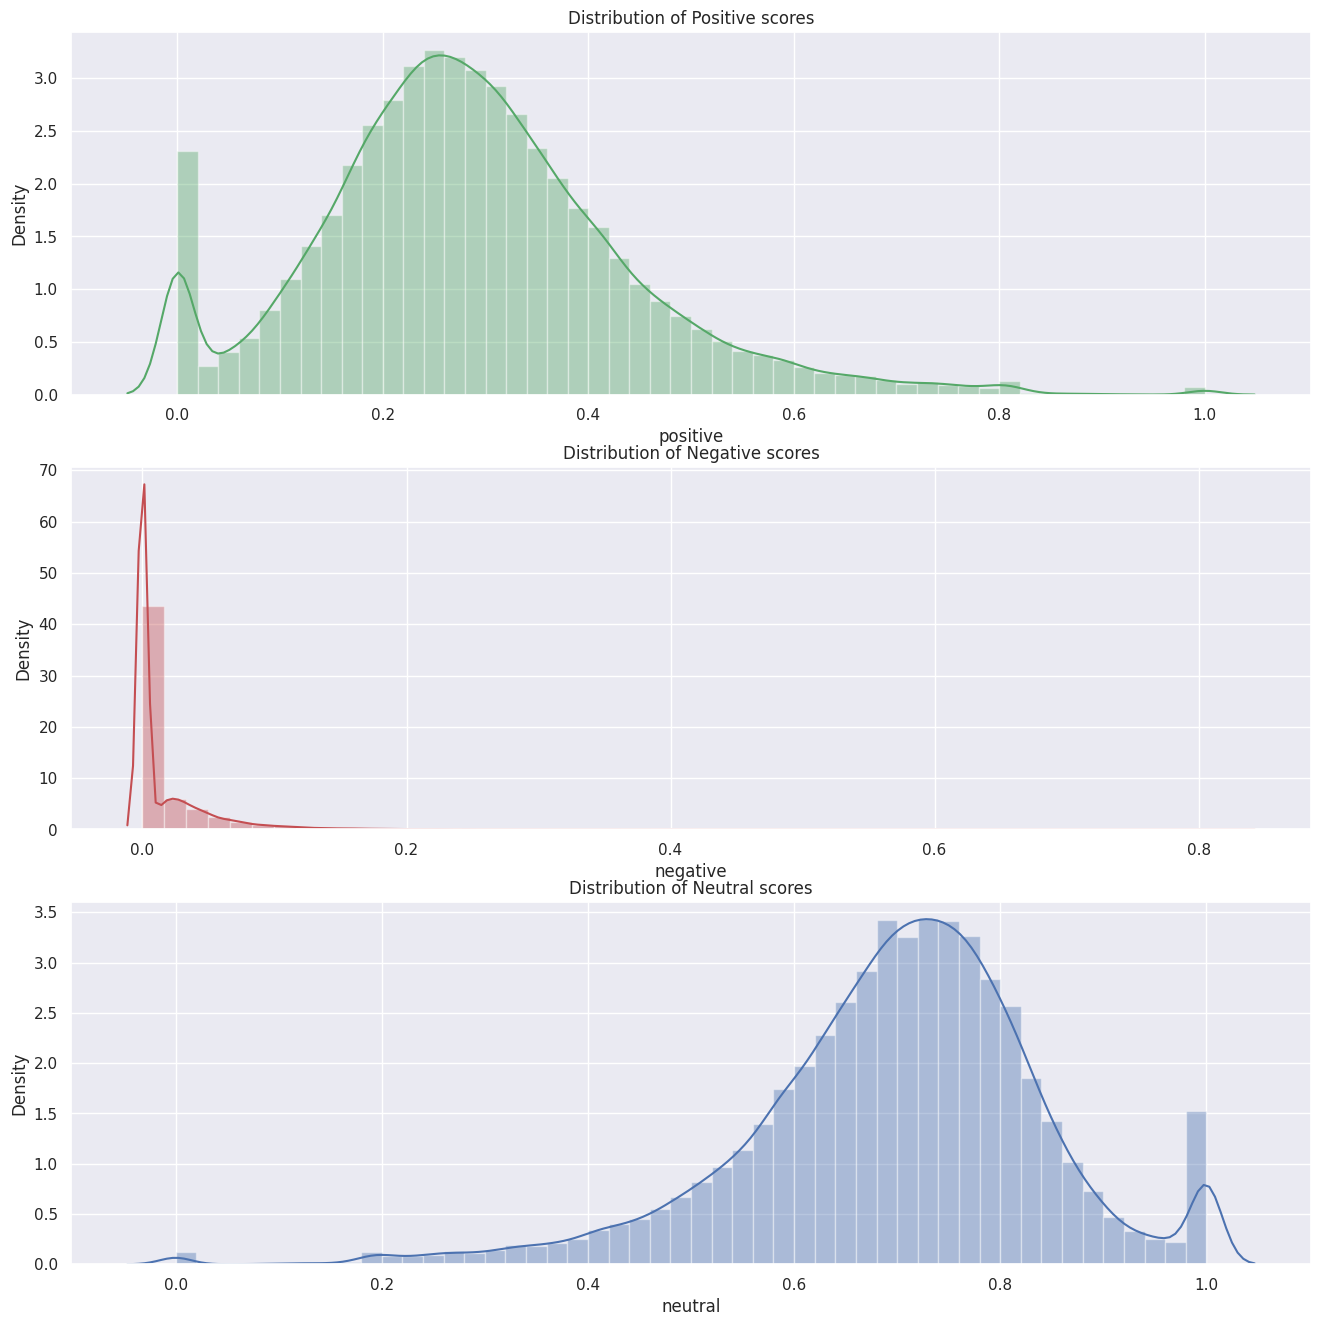

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(16, 16))
sb.distplot(df["positive"],ax = axes[0], color = 'g').set_title("Distribution of Positive scores")
sb.distplot(df["negative"],ax = axes[1],color = 'r').set_title("Distribution of Negative scores")
sb.distplot(df["neutral"],ax = axes[2],color = 'b').set_title("Distribution of Neutral scores")

In [ ]:
sentiment_score = df['compound']
rating = round((sentiment_score + 1) * 2.5, 1)

In [ ]:
df['rating'] = rating

In [ ]:
def sentiment(rating):
  if rating <= 5 and rating > 4 :
    return 2
  elif rating <= 2 and rating > 0:
    return 0
  else:
    return 1
df['Sentiment'] = df['rating'].apply(sentiment)
df.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  positive  negative  \
0  My stay at islam's place was really cool! Good...     0.352       0.0   
1  Great location for both airport and city - gre...     0.361       0.0   
2  We really enjoyed our stay at Islams house. Fr...     0.233       0.0   
3  The room was nice and clean and so were the co...     0.327       0.0   
4  Great location. Just 5 mins walk from the Airp...     0.363       0.0   

   neutral  compound  rating  Sentiment  
0    0.648    0.9626     4.9          2  
1    0.639    0.9061     4.8          2  
2    0.767    0.9663     4.9          2  
3    0.673    0.9267     4.8          2  
4    0.637    0.8658     4.7          2

In [ ]:
fig = go.Figure([go.Bar(x=df.Sentiment.value_counts().index, y=df.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review

def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

df["Review_processed"] = df["comments"].apply(reviewParse).apply(clean_review) #Parse all the reviews for their punctuation and add it into a new column

df.head() #Take a peek at the dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  positive  negative  \
0  My stay at islam's place was really cool! Good...     0.352       0.0   
1  Great location for both airport and city - gre...     0.361       0.0   
2  We really enjoyed our stay at Islams house. Fr...     0.233       0.0   
3  The room was nice and clean and so were the co...     0.327       0.0   
4  Great location. Just 5 mins walk from the Airp...     0.363       0.0   

   neutral  compound  rating  Sentiment  \
0    0.648    0.9626     4.9          2   
1    0.639    0.9061     4.8          2   
2    0.767    0.9663     4.9          2   
3    0.673    0.9267     4.8          2   
4    0.637    0.8658     4.7          2   

                                    Review_processed  
0  my stay islams place really cool good location...  
1  great location airport city great amenities ho...  
2  we really enjoyed stay islams house from outsi...  
3  the room nice clean commodities very close air...  
4  great location just mins walk airport station ...

## Removing Non English Reviews

In [ ]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df['is_english'] = df['Review_processed'].apply(is_english)

In [ ]:
df = df[df['is_english'] == True]

# Word Cloud

In [ ]:
from wordcloud import WordCloud
import collections
import matplotlib.cm as cm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import plotly.express as px

In [ ]:
positive_df = df[df['Sentiment'] == 2]
negative_df = df[df['Sentiment'] == 0]
neutral_df = df[df['Sentiment'] == 1]

def generate_word_cloud(sentiment_df):
    text_data = " ".join(sentiment_df['Review_processed'])
    wordcloud = WordCloud().generate(text_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    all_stopwords = stopwords.words('english')
    stop_words = set(all_stopwords + list(string.punctuation))
    stop_words = [x.lower().strip() for x in stop_words]

    tokenizer = nltk.RegexpTokenizer(r"\w+")
    word_tokens = tokenizer.tokenize(sentiment_df['Review_processed'].str.cat(sep=' '))
    filtered_sentence = [re.sub(r'\d+', '', word_tokens[i]) for i in range(len(word_tokens))]
    filtered_sentence = [w for w in filtered_sentence if not w.lower() in stop_words]

    counted_words = collections.Counter(filtered_sentence)
    top10words = []
    top10counts = []
    for letter, count in counted_words.most_common(10):
        top10words.append(letter)
        top10counts.append(count)
    print("")
    colors = cm.rainbow(np.linspace(0, 1, 10))
    f2 = plt.figure()
    plt.title('Top 10 words  vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(top10words, top10counts, color=colors)
    plt.show()

## Positive Word Cloud and Top 10 Words in Positive Sentiment

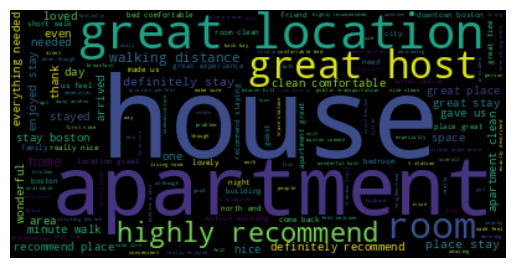

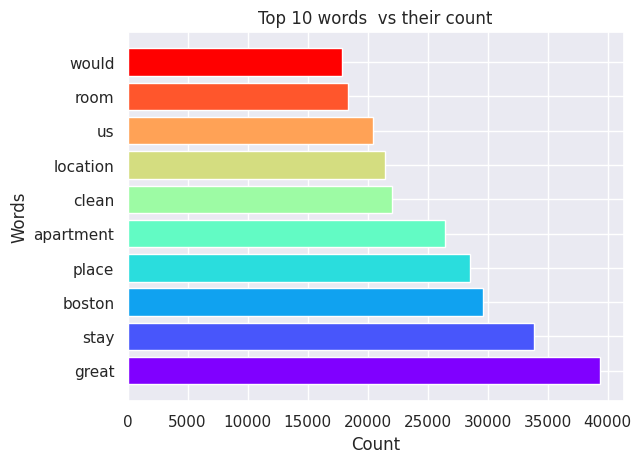

In [ ]:
generate_word_cloud(positive_df)

## Negative Word Cloud and Top 10 Words in Negative Sentiment

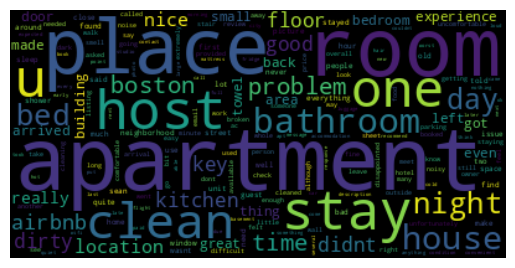

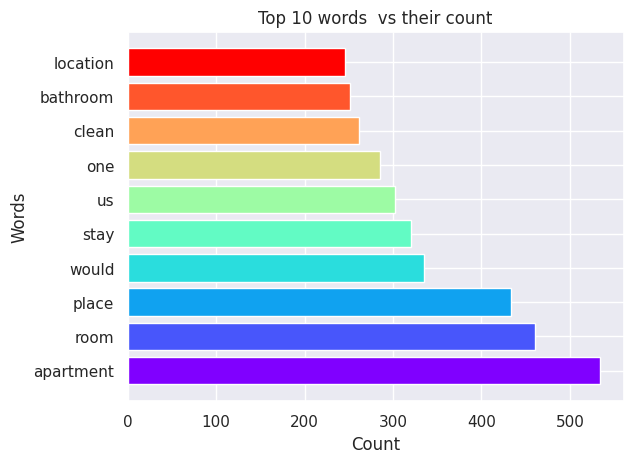

In [ ]:
generate_word_cloud(negative_df)

## Neutral Word Cloud and Top 10 Words in Neutral Sentiment

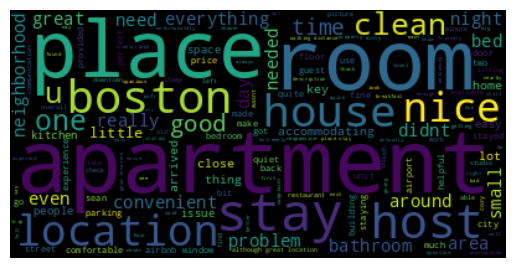

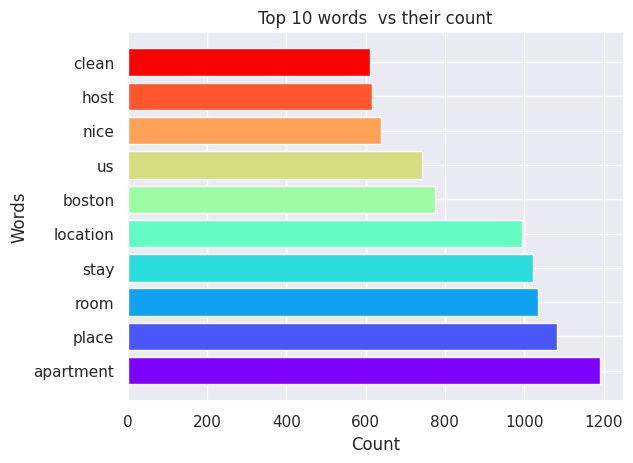

In [ ]:
generate_word_cloud(neutral_df)

# Listings Visulization

In [ ]:
nbhoods = listing['neighbourhood_cleansed'].unique()
listingsdf = listing.rename(columns={"id": "listing_id"})

listingsdf_copy = listingsdf.copy()
listingsdf_copy['price'] = listingsdf_copy['price'].replace('[\$,]', '', regex=True).astype(float)      # convert string type into number type for price and remove $ sign
listingsdf_copy['price_per_accommodates'] = listingsdf_copy['price']/listingsdf_copy['accommodates']    # create the price per accommodates column which seems better to indicate the price of the rental property
nhood_price_avg = listingsdf_copy.groupby(['neighbourhood_cleansed'])['price_per_accommodates'].mean()
nhood_ratescore_avg = listingsdf_copy.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean()

## Listings Mean Price Per Accommodation In NeighbourHood

In [ ]:
import json
boston = json.load(open('map.geojson'))
fig = px.choropleth_mapbox(nhood_price_avg.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='price_per_accommodates',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

The high price per accommodates area concentrate around the city center

## Listings Mean Review Score Rating In NeighbourHood

In [ ]:
fig = px.choropleth_mapbox(nhood_ratescore_avg.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='review_scores_rating',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

Generally, high review score areas are the city center and West Roxbury areas. In opposite, Mission Hill, Roxbury, Dorchester, Fenway seems having lowest review rates.

Leather district have an incredibly high average review rate

## Sentiment Across Listings

In [ ]:
merged_listing_review = df.merge(listing, left_on='listing_id', right_on='id', how='inner')
neighborhood_sentiment = merged_listing_review.groupby(['listing_id','latitude','longitude'])['compound'].mean().reset_index()
neighborhood_sentiment['compound_abs'] =  neighborhood_sentiment['compound'].abs()

In [ ]:
positive_neighborhood_sentiment = neighborhood_sentiment[neighborhood_sentiment['compound'] > 0.5]
negative_neighborhood_sentiment = neighborhood_sentiment[neighborhood_sentiment['compound'] < 0]
neutral_neighborhood_sentiment = neighborhood_sentiment[(neighborhood_sentiment['compound'] < 0.5) & (neighborhood_sentiment['compound'] > 0)]

## Positive Sentiment Listings

In [ ]:
fig = px.scatter_mapbox(positive_neighborhood_sentiment[['listing_id','compound','compound_abs']],
                        lat = positive_neighborhood_sentiment['latitude'],
                        lon = positive_neighborhood_sentiment['longitude'],
                        hover_name = 'listing_id',
                        hover_data=['compound'],
                        color='compound',
                        color_continuous_scale='RdYlGn',
                        size='compound_abs',
                        size_max=10,
                        zoom=10,
                        mapbox_style='carto-positron')

fig.show()

## Negative Sentiment Listings

In [ ]:
fig = px.scatter_mapbox(negative_neighborhood_sentiment[['listing_id','compound','compound_abs']],
                        lat = negative_neighborhood_sentiment['latitude'],
                        lon = negative_neighborhood_sentiment['longitude'],
                        hover_name = 'listing_id',
                        hover_data=['compound'],
                        color='compound',
                        color_continuous_scale='RdYlGn',
                        size='compound_abs',
                        size_max=20,
                        zoom=10,
                        mapbox_style='carto-positron')

fig.show()

## Neutral Sentiment Listings

In [ ]:
fig = px.scatter_mapbox(neutral_neighborhood_sentiment[['listing_id','compound','compound_abs']],
                        lat = neutral_neighborhood_sentiment['latitude'],
                        lon = neutral_neighborhood_sentiment['longitude'],
                        hover_name = 'listing_id',
                        hover_data=['compound'],
                        color='compound',
                        color_continuous_scale='RdYlGn',
                        size='compound_abs',
                        size_max=20,
                        zoom=10,
                        mapbox_style='carto-positron')

fig.show()

## Sentiments Overall Neighbourhood

In [ ]:
neighborhood_sentiment = merged_listing_review.groupby('neighbourhood_cleansed')['compound'].mean().reset_index()

In [ ]:
fig = px.choropleth_mapbox(neighborhood_sentiment.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='compound',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

# TF-IDF Vectorization

In [ ]:
docs = list(df['Review_processed'].astype('U').values)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)

In [ ]:
X = tfidf_vectorizer_vectors.toarray()
Y = df['Sentiment']

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [ ]:
fig = go.Figure([go.Bar(x=Y.value_counts().index, y=Y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

# Naive Bayes Implemetation

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 0.8226
Testing Accuracy score: 0.7215


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.11      0.43      0.18        54
     neutral       0.17      0.28      0.21       200
    negative       0.93      0.78      0.85      1746

    accuracy                           0.72      2000
   macro avg       0.40      0.50      0.41      2000
weighted avg       0.83      0.72      0.77      2000



## Confusion Matrix

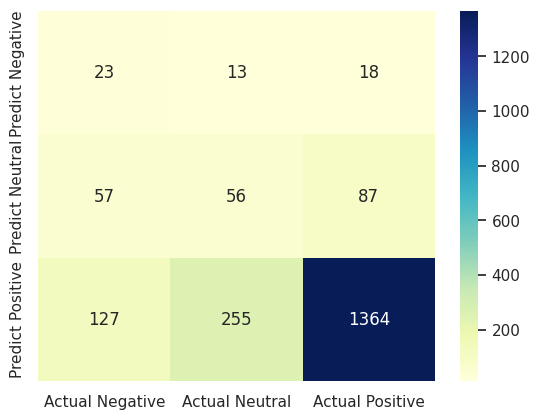

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.867


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.47      0.37      0.41        54
     neutral       0.41      0.39      0.40       200
    negative       0.93      0.94      0.93      1746

    accuracy                           0.87      2000
   macro avg       0.60      0.57      0.58      2000
weighted avg       0.86      0.87      0.86      2000



## Confusion Matrix

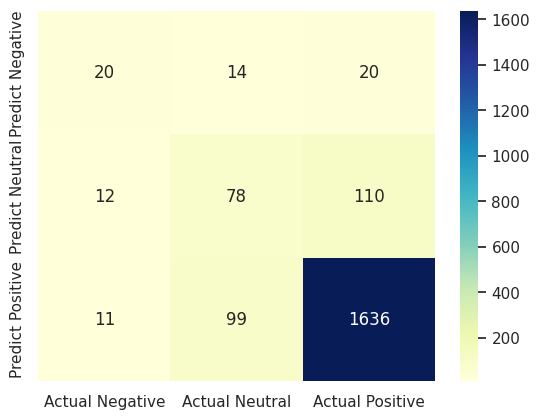

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.9055


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.78      0.26      0.39        54
     neutral       0.66      0.34      0.45       200
    negative       0.92      0.99      0.95      1746

    accuracy                           0.91      2000
   macro avg       0.79      0.53      0.60      2000
weighted avg       0.89      0.91      0.89      2000



## Confusion Matrix

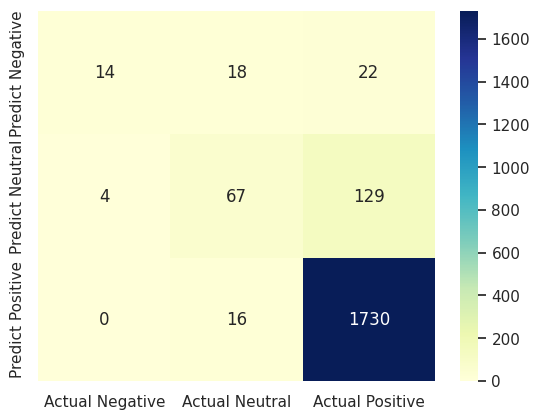

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  # kernels options ('linear', 'rbf', 'poly')
svm_classifier.fit(X_train, y_train)
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 0.9566
Testing Accuracy score: 0.9105


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.75      0.28      0.41        54
     neutral       0.70      0.37      0.49       200
    negative       0.92      0.99      0.96      1746

    accuracy                           0.91      2000
   macro avg       0.79      0.55      0.62      2000
weighted avg       0.90      0.91      0.89      2000



## Confusion Matrix

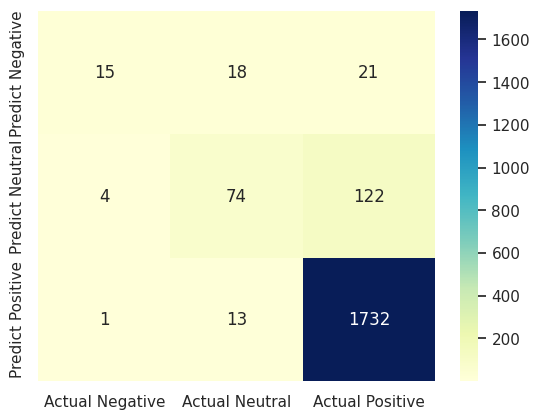

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# K Nearest Neighbours(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 0.1432
Testing Accuracy score: 0.1185


## Clasification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00        54
     neutral       0.10      0.98      0.18       200
    negative       0.93      0.02      0.05      1746

    accuracy                           0.12      2000
   macro avg       0.34      0.33      0.08      2000
weighted avg       0.82      0.12      0.06      2000



## Confusion Matrix

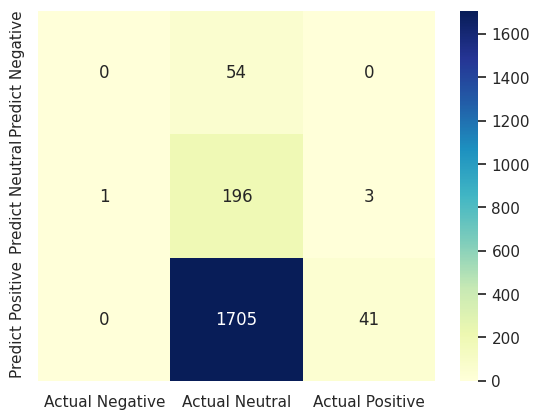

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Training Accuracy score: 0.931
Testing Accuracy score: 0.931


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00        48
     neutral       0.00      0.00      0.00       228
    negative       0.93      1.00      0.96      3724

    accuracy                           0.93      4000
   macro avg       0.31      0.33      0.32      4000
weighted avg       0.87      0.93      0.90      4000



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Confusion Matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



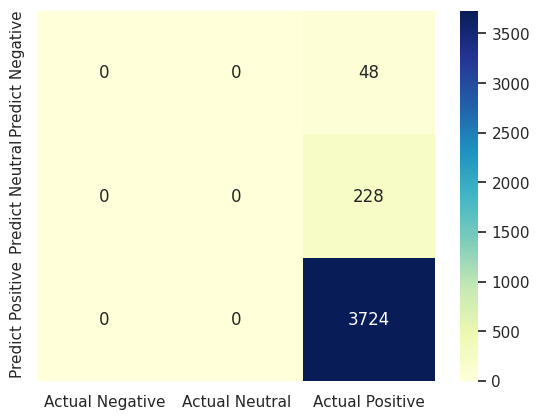

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Topic Modelling

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
corpus_positive = list(df[df['Sentiment'] == 2]['Review_processed'])
corpus_negative = list(df[df['Sentiment'] == 1]['Review_processed'])
corpus_neutral = list(df[df['Sentiment'] == 0]['Review_processed'])

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

## Positive Sentiment Top 3 Topics

In [ ]:
processed_corpus = [preprocess(text) for text in corpus_positive]
dictionary = Dictionary(processed_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_corpus]
num_topics = 3
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

In [ ]:
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.save_html(vis_data, 'lda_visualization_positive.html')

## Negative Sentiment Top 3 Topics

In [ ]:
processed_corpus = [preprocess(text) for text in corpus_negative]
dictionary = Dictionary(processed_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_corpus]
num_topics = 3
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

In [ ]:
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.save_html(vis_data, 'lda_visualization_negative.html')

## Neutral Sentiment Top 3 Topics

In [ ]:
processed_corpus = [preprocess(text) for text in corpus_neutral]
dictionary = Dictionary(processed_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_corpus]
num_topics = 3
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)

In [ ]:
vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.save_html(vis_data, 'lda_visualization_neutral.html')

# Random Forest Feature Importance

In [ ]:
feature_importances = rf_clf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

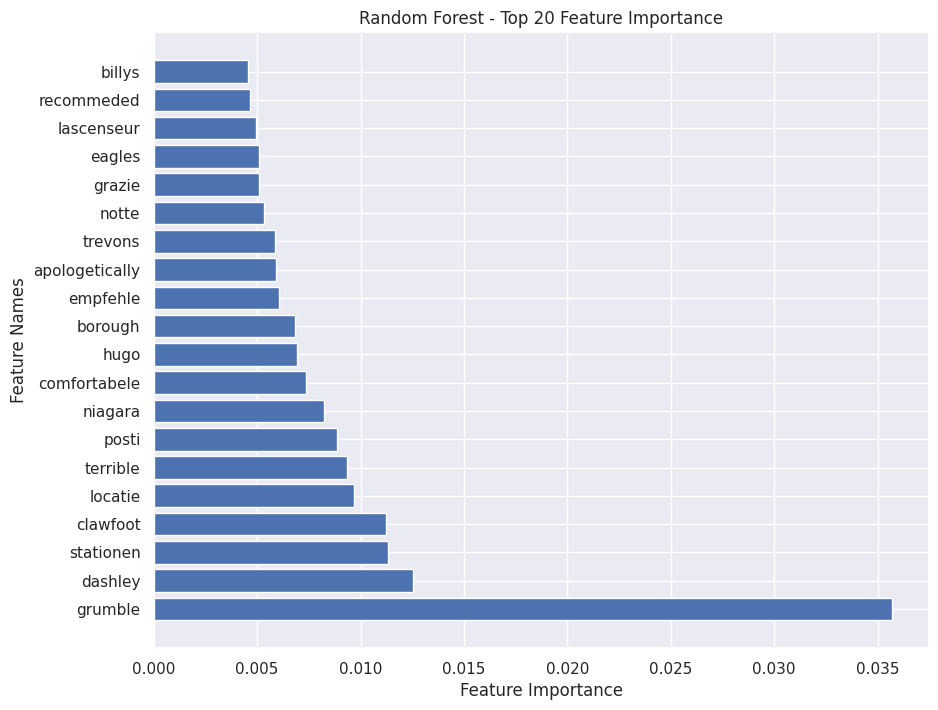

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_feature_importance(importance, names, model_type):
    data = {'feature_names': names, 'feature_importance': importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.barh(fi_df['feature_names'][:20], fi_df['feature_importance'][:20])  # Plotting top 20 features
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.title(f'{model_type} - Top 20 Feature Importance')
    plt.show()

plot_feature_importance(feature_importances, feature_names, "Random Forest")

# Retention Status

In [ ]:
docs = list(df['Review_processed'].astype('U').values)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
X = tfidf_vectorizer_vectors.toarray()
Y = df['Sentiment']

In [ ]:
prediction_all = rf_clf.predict(X)

In [ ]:
df['predicted_sentiment'] = prediction_all

In [ ]:
df['predicted_sentiment'].unique()

array([2, 0, 1])

In [ ]:
avg_sentiment_by_customer = df.groupby(['reviewer_id'])['predicted_sentiment'].mean().reset_index()

In [ ]:
def classify_sentiment(score):
    if score > 1.5:
        return 'Positive'
    elif score > 1 and score < 1.5:
        return 'Neutral'
    else:
        return 'Negative'

avg_sentiment_by_customer['sentiment_category'] = avg_sentiment_by_customer['predicted_sentiment'].apply(classify_sentiment)
avg_sentiment_by_customer.head()

reviewer_id  predicted_sentiment sentiment_category
0          143                  1.0           Negative
1          322                  2.0           Positive
2          933                  2.0           Positive
3         1960                  0.0           Negative
4         2237                  2.0           Positive

In [ ]:
df['date'] = pd.to_datetime(df['date'])
retention_status = (df.groupby('reviewer_id')['date'].max() - df.groupby('reviewer_id')['date'].min()).apply(lambda x: 'Returning' if x.days > 90 else 'New')
retention_status = retention_status.reset_index()
retention_status.rename(columns={'date': 'retention_status'}, inplace=True)
retention_status.head()

reviewer_id retention_status
0          143              New
1          322              New
2          933              New
3         1960              New
4         2237              New

In [ ]:
customer_data =  pd.merge(avg_sentiment_by_customer, retention_status, on='reviewer_id')

## Overall Percentage of Retention Status

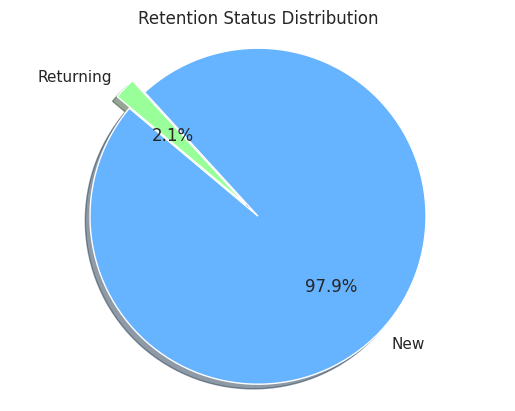

In [ ]:
retention_counts = customer_data['retention_status'].value_counts()
total_entries = len(retention_counts)

retention_percentages = (retention_counts / total_entries) * 100

labels = retention_percentages.index
sizes = retention_percentages.values
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Retention Status Distribution")
plt.show()

## Visualizing Sentiment Category with respect to Retention Status

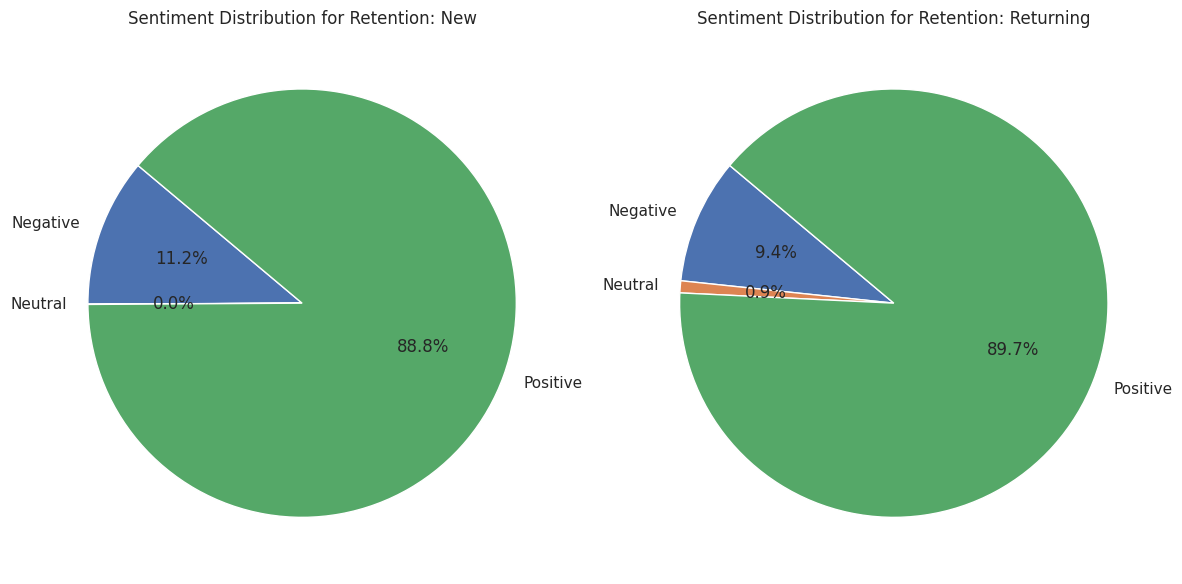

In [ ]:
import matplotlib.pyplot as plt

grouped = customer_data.groupby(['sentiment_category', 'retention_status']).size().unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for idx, retention_status in enumerate(grouped.columns):
    ax = axes[idx]
    sizes = grouped[retention_status].values
    labels = grouped.index
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Sentiment Distribution for Retention: {retention_status}')

plt.tight_layout()
plt.show()

## Negative Predicted Listings and there Retention Status to Visualize which listings are to be updated to increase retention

In [ ]:
merged_review_customer = customer_data.merge(df, left_on='reviewer_id', right_on='reviewer_id', how='left')
merged_customer_listing = merged_review_customer.merge(listing, left_on='listing_id', right_on='id', how='inner')
merged_customer_listing = merged_customer_listing.drop_duplicates(subset=['reviewer_id'], keep='first')

In [ ]:
negative_customers = merged_customer_listing[merged_customer_listing['sentiment_category'] == 'Negative']

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(negative_customers[['listing_id','predicted_sentiment_x','retention_status']],
                        lat = negative_customers['latitude'],
                        lon = negative_customers['longitude'],
                        hover_name = 'listing_id',
                        hover_data=['retention_status'],
                        color='predicted_sentiment_x',
                        #color_continuous_scale='RdYlGn',
                        # size='retention_status',
                        size_max=5,
                        zoom=10,
                        mapbox_style='carto-positron')

fig.show()